## 서울시 보행노인 사고다발지역 데이터 탐색

In [ ]:
!pip install xmltodict

In [ ]:
import requests
import xmltodict

In [ ]:
serviceKey = '3xIsYHnnfzFVojPIORumsGuWE+JeUnuSOX5EeqvoFAvNEK9ZZJb0H0KPajEsHMMMyUdP5ENP3jcWbAJ80VALmA=='

In [ ]:
url = 'http://apis.data.go.kr/B552061/frequentzoneLg/getRestFrequentzoneLg'

In [ ]:
params ={'serviceKey' : serviceKey, 
         'searchYearCd' : '2020', 
         'siDo' : '11', 
         'guGun' : '200', 
         'type' : 'xml', 
         'numOfRows' : '10', 
         'pageNo' : '1' }

In [ ]:
response = requests.get(url, params=params)
print(response.status_code)

200


In [ ]:
result = xmltodict.parse( response.text )
type( result )

collections.OrderedDict

In [ ]:
result.keys()

odict_keys(['response'])

In [ ]:
type( result['response'] )

collections.OrderedDict

In [ ]:
result['response'].keys()

odict_keys(['header', 'body'])

In [ ]:
result['response']['body']['items'].keys()

odict_keys(['item'])

```
afos_fid : 다발지역에 대한 공간정보 식별자
afos_id : 다발지역ID
bjd_cd : 법정동코드
spot_cd : 지점코드(사고다발지역 목록 내의 지점코드)
**sido_sgg_nm : 시도시군구명**
**spot_nm : 지점명**
**occrrnc_cnt : 사고 발생건수**
**caslt_cnt : 사상자수**
**dth_dnv_cnt : 사망자수**
**se_dnv_cnt : 중상자수**
**sl_dnv_cnt : 경상자수**
wnd_dnv_cnt : 부상신고자수
lo_crd : 다발지역지점 중심점의 경도(EPSG 4326)
la_crd : 다발지역지점 중심점의 위도(EPSG 4326)
**geom_json : 다발지역 지점의 폴리곤 정보(EPSG 4326)**
totalCount : 총건수
numOfRows : 검색건수
pageNo : 페이지 번호
```

In [ ]:
result['response']['body']['items']['item']

[OrderedDict([('afos_fid', '6715448'),
              ('afos_id', '2021056'),
              ('bjd_cd', '1120011400'),
              ('spot_cd', '11200001'),
              ('sido_sgg_nm', '서울특별시 성동구1'),
              ('spot_nm', '서울특별시 성동구 성수동1가(성수대교 인근)'),
              ('occrrnc_cnt', '51'),
              ('caslt_cnt', '77'),
              ('dth_dnv_cnt', '0'),
              ('se_dnv_cnt', '20'),
              ('sl_dnv_cnt', '55'),
              ('wnd_dnv_cnt', '2'),
              ('geom_json',
               '{"type":"Polygon","coordinates":[[[127.03685334,37.54423617],[127.03682745,37.54402773],[127.03675077,37.54382731],[127.03662625,37.5436426],[127.03645868,37.5434807],[127.03625449,37.54334783],[127.03602153,37.5432491],[127.03576875,37.5431883],[127.03550587,37.54316777],[127.03524299,37.5431883],[127.03499022,37.5432491],[127.03475726,37.54334783],[127.03455306,37.5434807],[127.03438549,37.5436426],[127.03426097,37.54382731],[127.03418429,37.54402773],[127.0341584,37.54423617],

In [ ]:
for row in result['response']['body']['items']['item']:
    print('시군구:', row['spot_nm'].split(' ')[1])
    print('사고발생 지점명:', row['spot_nm'])
    print('사고발생 건수:', row['occrrnc_cnt'])
    print('사상자수:', row['caslt_cnt'])
    print('사망자수:', row['dth_dnv_cnt'])
    print('중상자수:', row['se_dnv_cnt'])
    print('경상자수:', row['sl_dnv_cnt'], end='\n\n')

시군구: 성동구
사고발생 지점명: 서울특별시 성동구 성수동1가(성수대교 인근)
사고발생 건수: 51
사상자수: 77
사망자수: 0
중상자수: 20
경상자수: 55

시군구: 성동구
사고발생 지점명: 서울특별시 성동구 송정동(성수동1가6741 인근)
사고발생 건수: 29
사상자수: 34
사망자수: 0
중상자수: 7
경상자수: 25

시군구: 성동구
사고발생 지점명: 서울특별시 성동구 성수동1가(왕십리역1번출구 인근)
사고발생 건수: 28
사상자수: 46
사망자수: 0
중상자수: 6
경상자수: 36



## 데이터 전처리

In [ ]:
import pandas as pd

In [ ]:
# 2020년 보행노인 사고다발지역 자료를 데이터프레임 형태로 변환하는 함수
# gu: gugun 입력값

def accident_data(gu, serviceKey):
  url = 'http://apis.data.go.kr/B552061/frequentzoneLg/getRestFrequentzoneLg'
  params ={'serviceKey' : serviceKey, 
         'searchYearCd' : '2020', 
         'siDo' : '11', 
         'guGun' : gu, 
         'type' : 'xml', 
         'numOfRows' : '10', 
         'pageNo' : '1' }

  response = requests.get(url, params=params)
  result = xmltodict.parse(response.text)

  df = pd.DataFrame(result['response']['body']['items']['item'])

  return df

In [ ]:
serviceKey = '3xIsYHnnfzFVojPIORumsGuWE+JeUnuSOX5EeqvoFAvNEK9ZZJb0H0KPajEsHMMMyUdP5ENP3jcWbAJ80VALmA=='

In [ ]:
gu_list = [680, 740, 305, 500, 620, 215, 530, 545, 350, 320, 230, 590, 440, 410, 650, 200, 290, 710, 470, 560, 170, 380, 110, 140, 260]

In [ ]:
# 지역별로 데이터 프레임을 만든 뒤 하나의 데이터 프레임으로 병합
df = pd.DataFrame()

for gu in gu_list:
  df_ = accident_data(gu, serviceKey)
  df_c = pd.concat([df, df_])
  df = df_c

df

,afos_fid,afos_id,bjd_cd,spot_cd,sido_sgg_nm,spot_nm,occrrnc_cnt,caslt_cnt,dth_dnv_cnt,se_dnv_cnt,sl_dnv_cnt,wnd_dnv_cnt,geom_json,lo_crd,la_crd
0,6715508,2021056,1168011500,11680001,서울특별시 강남구1,서울특별시 강남구 수서동(수서역앞교차로 인근),52,74,0,9,59,6,"{""type"":""Polygon"",""coordinates"":[[[127.1030364...",127.101689005644,37.487361948496
1,6715509,2021056,1168010400,11680002,서울특별시 강남구2,서울특별시 강남구 압구정동(송담빌딩 인근),50,64,0,16,45,3,"{""type"":""Polygon"",""coordinates"":[[[127.0495921...",127.048244661663,37.524356645444
2,6715510,2021056,1168010100,11680003,서울특별시 강남구3,서울특별시 강남구 역삼동(르네상스호텔사거리 인근),48,65,0,13,51,1,"{""type"":""Polygon"",""coordinates"":[[[127.0441395...",127.04279212156,37.502616258035
0,6715513,2021056,1174010900,11740001,서울특별시 강동구1,서울특별시 강동구 천호동(천호사거리 인근),41,47,0,13,31,3,"{""type"":""Polygon"",""coordinates"":[[[127.1247665...",127.12341905085,37.538661191762
1,6715514,2021056,1174010500,11740002,서울특별시 강동구2,서울특별시 강동구 성내동(길동사거리 인근),31,37,0,13,23,1,"{""type"":""Polygon"",""coordinates"":[[[127.1399224...",127.138574979952,37.533955263426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,6715439,2021056,1114011400,11140002,서울특별시 중구2,서울특별시 중구 정동(우성빌딩 인근),39,52,0,5,40,7,"{""type"":""Polygon"",""coordinates"":[[[126.9791422...",126.977794754725,37.563850805671
2,6715440,2021056,1114010500,11140003,서울특별시 중구3,서울특별시 중구 남대문로2가(을지로1가 인근),33,51,0,5,36,10,"{""type"":""Polygon"",""coordinates"":[[[126.9848618...",126.983514340416,37.566013208444
0,6715533,2021056,1126010500,11260001,서울특별시 중랑구1,서울특별시 중랑구 신내동(망우사거리 인근),41,56,1,11,42,2,"{""type"":""Polygon"",""coordinates"":[[[127.1017930...",127.100445537333,37.599881333158
1,6715534,2021056,1126010100,11260002,서울특별시 중랑구2,서울특별시 중랑구 망우동(장안교앞 인근),35,60,0,12,45,3,"{""type"":""Polygon"",""coordinates"":[[[127.0817264...",127.08037893664,37.581308326519


In [ ]:
df.columns

Index(['afos_fid', 'afos_id', 'bjd_cd', 'spot_cd', 'sido_sgg_nm', 'spot_nm',
       'occrrnc_cnt', 'caslt_cnt', 'dth_dnv_cnt', 'se_dnv_cnt', 'sl_dnv_cnt',
       'wnd_dnv_cnt', 'geom_json', 'lo_crd', 'la_crd'],
      dtype='object')

In [ ]:
# 불필요한 데이터 제거(다발지역FID, 다발지역ID, 법정동코드, 지점코드,다발지역폴리곤, '경도', '위도', '부상신고자수')
df_accident = df.drop(['afos_fid', 'afos_id', 'bjd_cd', 'spot_cd','geom_json', 'lo_crd', 'la_crd', 'wnd_dnv_cnt'], axis=1)
df_accident

,sido_sgg_nm,spot_nm,occrrnc_cnt,caslt_cnt,dth_dnv_cnt,se_dnv_cnt,sl_dnv_cnt
0,서울특별시 강남구1,서울특별시 강남구 수서동(수서역앞교차로 인근),52,74,0,9,59
1,서울특별시 강남구2,서울특별시 강남구 압구정동(송담빌딩 인근),50,64,0,16,45
2,서울특별시 강남구3,서울특별시 강남구 역삼동(르네상스호텔사거리 인근),48,65,0,13,51
0,서울특별시 강동구1,서울특별시 강동구 천호동(천호사거리 인근),41,47,0,13,31
1,서울특별시 강동구2,서울특별시 강동구 성내동(길동사거리 인근),31,37,0,13,23
...,...,...,...,...,...,...,...
1,서울특별시 중구2,서울특별시 중구 정동(우성빌딩 인근),39,52,0,5,40
2,서울특별시 중구3,서울특별시 중구 남대문로2가(을지로1가 인근),33,51,0,5,36
0,서울특별시 중랑구1,서울특별시 중랑구 신내동(망우사거리 인근),41,56,1,11,42
1,서울특별시 중랑구2,서울특별시 중랑구 망우동(장안교앞 인근),35,60,0,12,45


In [ ]:
# index 재설정
df_accident = df_accident.reset_index()
df_accident

,index,sido_sgg_nm,spot_nm,occrrnc_cnt,caslt_cnt,dth_dnv_cnt,se_dnv_cnt,sl_dnv_cnt
0,0,서울특별시 강남구1,서울특별시 강남구 수서동(수서역앞교차로 인근),52,74,0,9,59
1,1,서울특별시 강남구2,서울특별시 강남구 압구정동(송담빌딩 인근),50,64,0,16,45
2,2,서울특별시 강남구3,서울특별시 강남구 역삼동(르네상스호텔사거리 인근),48,65,0,13,51
3,0,서울특별시 강동구1,서울특별시 강동구 천호동(천호사거리 인근),41,47,0,13,31
4,1,서울특별시 강동구2,서울특별시 강동구 성내동(길동사거리 인근),31,37,0,13,23
...,...,...,...,...,...,...,...,...
70,1,서울특별시 중구2,서울특별시 중구 정동(우성빌딩 인근),39,52,0,5,40
71,2,서울특별시 중구3,서울특별시 중구 남대문로2가(을지로1가 인근),33,51,0,5,36
72,0,서울특별시 중랑구1,서울특별시 중랑구 신내동(망우사거리 인근),41,56,1,11,42
73,1,서울특별시 중랑구2,서울특별시 중랑구 망우동(장안교앞 인근),35,60,0,12,45


In [ ]:
# index 컬럼 삭제
df_accident.drop('index', axis=1, inplace=True)
df_accident

,sido_sgg_nm,spot_nm,occrrnc_cnt,caslt_cnt,dth_dnv_cnt,se_dnv_cnt,sl_dnv_cnt
0,서울특별시 강남구1,서울특별시 강남구 수서동(수서역앞교차로 인근),52,74,0,9,59
1,서울특별시 강남구2,서울특별시 강남구 압구정동(송담빌딩 인근),50,64,0,16,45
2,서울특별시 강남구3,서울특별시 강남구 역삼동(르네상스호텔사거리 인근),48,65,0,13,51
3,서울특별시 강동구1,서울특별시 강동구 천호동(천호사거리 인근),41,47,0,13,31
4,서울특별시 강동구2,서울특별시 강동구 성내동(길동사거리 인근),31,37,0,13,23
...,...,...,...,...,...,...,...
70,서울특별시 중구2,서울특별시 중구 정동(우성빌딩 인근),39,52,0,5,40
71,서울특별시 중구3,서울특별시 중구 남대문로2가(을지로1가 인근),33,51,0,5,36
72,서울특별시 중랑구1,서울특별시 중랑구 신내동(망우사거리 인근),41,56,1,11,42
73,서울특별시 중랑구2,서울특별시 중랑구 망우동(장안교앞 인근),35,60,0,12,45


In [ ]:
# 컬럼명 변경
df_accident.columns = ['지역', '사고다발 지점', '발생건수', '사상자수', '사망자수', '중상자수', '경상자수']
df_accident

,지역,사고다발 지점,발생건수,사상자수,사망자수,중상자수,경상자수
0,서울특별시 강남구1,서울특별시 강남구 수서동(수서역앞교차로 인근),52,74,0,9,59
1,서울특별시 강남구2,서울특별시 강남구 압구정동(송담빌딩 인근),50,64,0,16,45
2,서울특별시 강남구3,서울특별시 강남구 역삼동(르네상스호텔사거리 인근),48,65,0,13,51
3,서울특별시 강동구1,서울특별시 강동구 천호동(천호사거리 인근),41,47,0,13,31
4,서울특별시 강동구2,서울특별시 강동구 성내동(길동사거리 인근),31,37,0,13,23
...,...,...,...,...,...,...,...
70,서울특별시 중구2,서울특별시 중구 정동(우성빌딩 인근),39,52,0,5,40
71,서울특별시 중구3,서울특별시 중구 남대문로2가(을지로1가 인근),33,51,0,5,36
72,서울특별시 중랑구1,서울특별시 중랑구 신내동(망우사거리 인근),41,56,1,11,42
73,서울특별시 중랑구2,서울특별시 중랑구 망우동(장안교앞 인근),35,60,0,12,45


In [ ]:
df_accident_t = df_accident.copy()

In [ ]:
# 지역에 있는 숫자 제거
for i in range(1,4):
  df_accident['지역'] = df_accident['지역'].str.replace(f'{i}', '')

In [ ]:
# 문자열 데이터를 숫자로 변환

df_accident['발생건수'] = pd.to_numeric(df_accident['발생건수'])
df_accident['사상자수'] = pd.to_numeric(df_accident['사상자수'])
df_accident['사망자수'] = pd.to_numeric(df_accident['사망자수'])
df_accident['중상자수'] = pd.to_numeric(df_accident['중상자수'])
df_accident['경상자수'] = pd.to_numeric(df_accident['경상자수'])

### 지역별 사고다발 지점, 발생건수, 사상자수, 사망자수

In [ ]:
df_accident

,지역,사고다발 지점,발생건수,사상자수,사망자수,중상자수,경상자수
0,서울특별시 강남구,서울특별시 강남구 수서동(수서역앞교차로 인근),52,74,0,9,59
1,서울특별시 강남구,서울특별시 강남구 압구정동(송담빌딩 인근),50,64,0,16,45
2,서울특별시 강남구,서울특별시 강남구 역삼동(르네상스호텔사거리 인근),48,65,0,13,51
3,서울특별시 강동구,서울특별시 강동구 천호동(천호사거리 인근),41,47,0,13,31
4,서울특별시 강동구,서울특별시 강동구 성내동(길동사거리 인근),31,37,0,13,23
...,...,...,...,...,...,...,...
70,서울특별시 중구,서울특별시 중구 정동(우성빌딩 인근),39,52,0,5,40
71,서울특별시 중구,서울특별시 중구 남대문로2가(을지로1가 인근),33,51,0,5,36
72,서울특별시 중랑구,서울특별시 중랑구 신내동(망우사거리 인근),41,56,1,11,42
73,서울특별시 중랑구,서울특별시 중랑구 망우동(장안교앞 인근),35,60,0,12,45


In [ ]:
# 전체 데이터의 평균, 표준편차, 사분위수, 최소값, 최대값 확인
df_accident.describe()

,발생건수,사상자수,사망자수,중상자수,경상자수
count,75.000000,75.000000,75.000000,75.000000,75.000000
mean,37.400000,52.360000,0.173333,8.320000,40.280000
std,9.832379,14.839356,0.381084,3.928964,13.381674
min,21.000000,27.000000,0.000000,0.000000,21.000000
25%,31.000000,41.500000,0.000000,5.000000,30.500000
50%,36.000000,50.000000,0.000000,8.000000,38.000000
75%,42.500000,63.000000,0.000000,10.500000,47.500000
max,64.000000,106.000000,1.000000,20.000000,86.000000


In [ ]:
df_accident_set = df_accident.set_index(['지역', '사고다발 지점'])
df_accident_set

발생건수  사상자수  사망자수  중상자수  경상자수
지역        사고다발 지점                                                  
서울특별시 강남구 서울특별시 강남구 수서동(수서역앞교차로 인근)      52    74     0     9    59
          서울특별시 강남구 압구정동(송담빌딩 인근)        50    64     0    16    45
          서울특별시 강남구 역삼동(르네상스호텔사거리 인근)    48    65     0    13    51
서울특별시 강동구 서울특별시 강동구 천호동(천호사거리 인근)        41    47     0    13    31
          서울특별시 강동구 성내동(길동사거리 인근)        31    37     0    13    23
...                                     ...   ...   ...   ...   ...
서울특별시 중구  서울특별시 중구 정동(우성빌딩 인근)           39    52     0     5    40
          서울특별시 중구 남대문로2가(을지로1가 인근)      33    51     0     5    36
서울특별시 중랑구 서울특별시 중랑구 신내동(망우사거리 인근)        41    56     1    11    42
          서울특별시 중랑구 망우동(장안교앞 인근)         35    60     0    12    45
          서울특별시 중랑구 망우동(한일써너스빌리젠시 인근)    35    57     0    10    41

[75 rows x 5 columns]

In [ ]:
# 각 지역별 사고다발지점에서의 사고 발생건수 및 사상자수의 합
df_accident.groupby('지역').sum()

,발생건수,사상자수,사망자수,중상자수,경상자수
지역,,,,,
서울특별시 강남구,150,203,0,38,155
서울특별시 강동구,103,124,0,29,88
서울특별시 강북구,125,166,1,19,128
서울특별시 강서구,121,165,0,27,121
서울특별시 관악구,159,198,2,42,147
서울특별시 광진구,86,121,0,17,97
서울특별시 구로구,100,142,0,23,115
서울특별시 금천구,93,130,1,26,96
서울특별시 노원구,105,159,0,23,130


### 그래프

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from matplotlib import font_manager, rcParams
!apt-get install fonts-nanum*
rcParams['font.family'] = 'NanumGothicCoding'
rcParams['axes.unicode_minus'] = False
font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


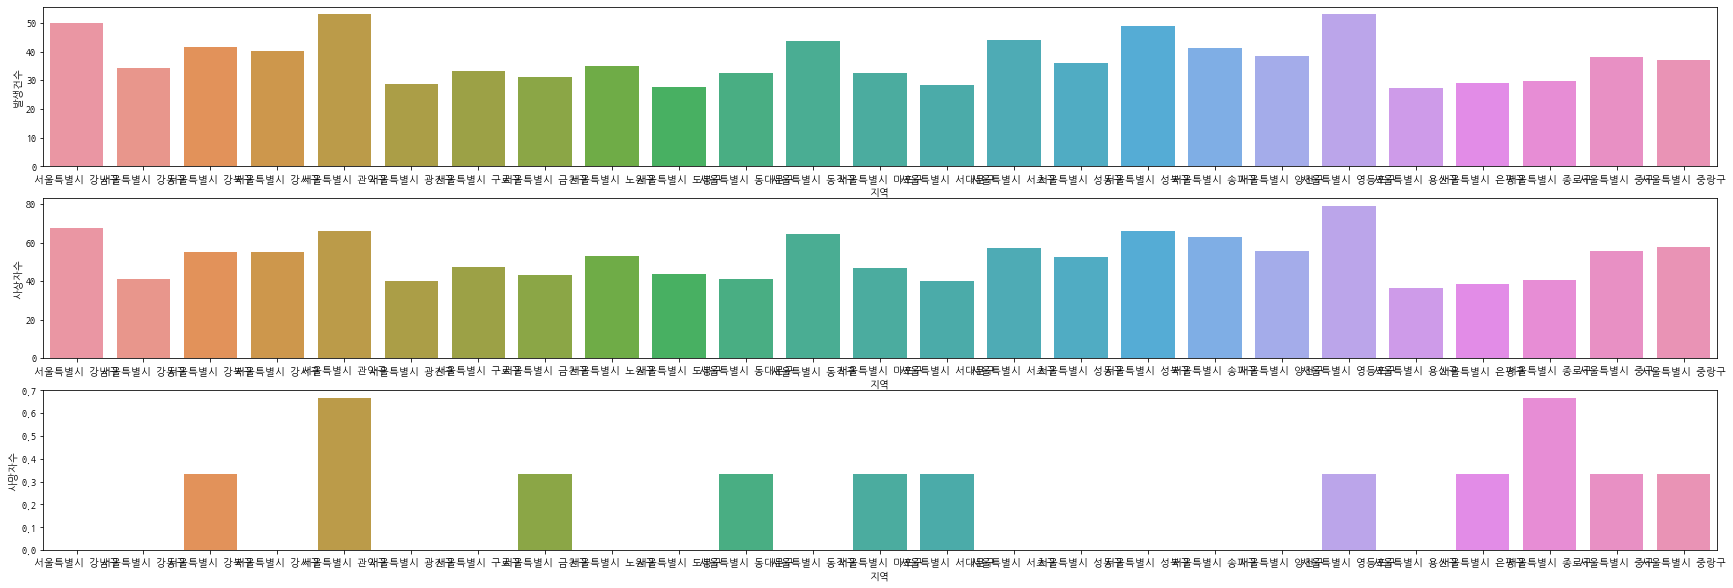

In [ ]:
plt.figure( figsize=(30,10) )
plt.subplot( 3, 1, 1)
sns.barplot(data=df_accident, x='지역', y='발생건수', ci=False)

plt.subplot( 3, 1, 2)
sns.barplot(data=df_accident, x='지역', y='사상자수', ci=False)

plt.subplot( 3, 1, 3)
sns.barplot(data=df_accident, x='지역', y='사망자수', ci=False)

plt.show()

- 구별 발생건수, 사상자수, 사망자수 데이터를 막대그래프로 시각화하였다.

 전체 데이터가 아닌 구별 사고다발지역 상위 3곳의 데이터를 합한 것으로 

 그래프에 보여지는 발생건수, 사상자수, 사망자수 자체에는 큰 의미가 없는 것으로 보인다.

### 사고다발지역 지점 시각화

In [ ]:
df = df.reset_index()

In [ ]:
df_accident_region =pd.DataFrame()
df_accident_region['사고다발 지점'] = df_accident['사고다발 지점']

In [ ]:
df_accident_region['위도'] = df['la_crd']
df_accident_region['경도'] = df['lo_crd']
df_accident_region

,사고다발 지점,위도,경도
0,서울특별시 강남구 수서동(수서역앞교차로 인근),37.487361948496,127.101689005644
1,서울특별시 강남구 압구정동(송담빌딩 인근),37.524356645444,127.048244661663
2,서울특별시 강남구 역삼동(르네상스호텔사거리 인근),37.502616258035,127.04279212156
3,서울특별시 강동구 천호동(천호사거리 인근),37.538661191762,127.12341905085
4,서울특별시 강동구 성내동(길동사거리 인근),37.533955263426,127.138574979952
...,...,...,...
70,서울특별시 중구 정동(우성빌딩 인근),37.563850805671,126.977794754725
71,서울특별시 중구 남대문로2가(을지로1가 인근),37.566013208444,126.983514340416
72,서울특별시 중랑구 신내동(망우사거리 인근),37.599881333158,127.100445537333
73,서울특별시 중랑구 망우동(장안교앞 인근),37.581308326519,127.08037893664


In [ ]:
df_accident_region[40:51]

,사고다발 지점,위도,경도
40,서울특별시 서대문구 현저동(독립문역 인근),37.572600,126.959787
41,서울특별시 서대문구 창천동(세브란스병원입구 인근),37.560030,126.939970
42,서울특별시 서초구 양재동(양재IC 인근),37.462214,127.037969
43,서울특별시 서초구 서초동(법원검찰청앞교차로 인근),37.493713,127.013698
44,서울특별시 서초구 염곡동(양재IC 인근),37.464896,127.041992
45,서울특별시 성동구 성수동1가(성수대교 인근),37.544236,127.035506
46,서울특별시 성동구 송정동(성수동1가6741 인근),37.552021,127.044298
47,서울특별시 성동구 성수동1가(왕십리역1번출구 인근),37.561540,127.035092
48,서울특별시 성북구 하월곡동(종암사거리 인근),37.603380,127.032205
49,서울특별시 성북구 하월곡동(길음역10번출구 인근),37.604026,127.026152


In [ ]:
# 문자열 데이터를 숫자로 변환

df_accident_region['위도'] = pd.to_numeric(df_accident_region['위도'])
df_accident_region['경도'] = pd.to_numeric(df_accident_region['경도'])

In [ ]:
import folium

In [ ]:
map = folium.Map( location = [37.53, 127], zoom_start=11, tiles="cartodbpositron" )

In [ ]:
from folium.plugins import MarkerCluster

In [ ]:
location = []

for i in df_accident_region.index:
  location.append([ df_accident_region.loc[i, '위도'], df_accident_region.loc[i, '경도'] ])

In [ ]:
df_accident_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   사고다발 지점  75 non-null     object 
 1   위도       75 non-null     float64
 2   경도       75 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.9+ KB


In [ ]:
map = folium.Map( location = [37.53, 127], zoom_start=12, tiles="cartodbpositron" )
MarkerCluster( location, overlay=True).add_to(map)
map

- 노인 보행자 사고 다발지점을 지도로 표시해서 확인한 결과 대부분의 지점이 '교차로'라는 공통점을 가지고 있음
 - 유일하게 성북구 하월곡동(길음역10번출구 인근)의 경우 교차로가 아님.

- 특정한 조건이 주어졌을 때, 사고가 발생할 확률을 구해보는 것은 어떨까? 재밌겠당